In [1]:
from oda_api.api import DispatcherAPI
from oda_api.plot_tools import OdaImage,OdaLightCurve
from oda_api.data_products import BinaryData
import os
from astropy.io import fits
import numpy as np
from numpy import sqrt,exp
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
source_name='V404 Cyg'
ra=306.01591666667
dec=33.867194444444
radius=15.
radius_jemx=5.
Tstart='2015-06-20T15:49:59'
Tstop='2015-06-25T4:05:59'
host='https://www.astro.unige.ch/cdci/astrooda/dispatch-data'
time_bin=100
Nbibs=16 # number of time bin in the long-term lightcurve
E1_keV=20.
E2_keV=40.
E1_keV_jemx=3.
E2_keV_jemx=13.

rebin=10

In [3]:
disp=DispatcherAPI(host=host)

In [20]:
import requests
url="https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem/api/v1.0/scwlist/cons/"
def queryxtime(**args):
    params=Tstart+'/'+Tstop+'?&ra='+str(ra)+'&dec='+str(dec)+'&radius='+str(radius)+'&min_good_isgri=1000'
    print(url+params)
    return requests.get(url+params).json()
def queryxtime_jemx1(**args):
    params=Tstart+'/'+Tstop+'?&ra='+str(ra)+'&dec='+str(dec)+'&radius='+str(radius_jemx)+'&min_good_jemx1=1000'
    print(url+params)
    return requests.get(url+params).json()
def queryxtime_jemx2(**args):
    params=Tstart+'/'+Tstop+'?&ra='+str(ra)+'&dec='+str(dec)+'&radius='+str(radius_jemx)+'&min_good_jemx2=1000'
    print(url+params)
    return requests.get(url+params).json()


#,cookies=cookies

In [5]:
#if token!='':
scwlist=queryxtime()
m=len(scwlist)
pointings_osa10=[]
pointings_osa11=[]
for i in range(m):
    if scwlist[i][-2:]=='10':
        if(int(scwlist[i][:4])<1626):
            pointings_osa10.append(scwlist[i]+'.001')
        else:
            pointings_osa11.append(scwlist[i]+'.001')
m_osa10=len(pointings_osa10)
m_osa11=len(pointings_osa11)
print(pointings_osa10)
print(pointings_osa11)

https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem/api/v1.0/scwlist/cons/2015-06-20T15:49:59/2015-06-25T4:05:59?&ra=306.01591666667&dec=33.867194444444&radius=15.0&min_good_isgri=1000
['155500040010.001', '155500050010.001', '155500060010.001', '155500070010.001', '155500080010.001', '155500090010.001', '155500100010.001', '155500110010.001', '155500120010.001', '155500140010.001', '155500150010.001', '155500160010.001', '155500170010.001', '155500180010.001', '155500190010.001', '155500200010.001', '155500210010.001', '155500220010.001', '155500230010.001', '155500240010.001', '155500250010.001', '155500260010.001', '155500270010.001', '155500280010.001', '155500290010.001', '155500300010.001', '155500310010.001', '155500320010.001', '155500330010.001', '155500340010.001', '155500350010.001', '155500360010.001', '155500370010.001', '155500380010.001', '155500390010.001', '155500400010.001', '155500430010.001', '155500440010.001', '155500450010.001', '155500460010.001

In [6]:
scw_lists_osa10=[]
scw_lists_osa11=[]
count=0
scw_string=''
for i in range(m_osa10):
    if count<50:
        scw_string=scw_string+str(pointings_osa10[i])+','
        count+=1
    else:
        scw_lists_osa10.append(scw_string[:-1])
        count=1
        scw_string=str(pointings_osa10[i])+','
scw_lists_osa10.append(scw_string[:-1])
print(len(scw_lists_osa10))
count=0
scw_string=''
for i in range(m_osa11):
    if count<50:
        scw_string=scw_string+str(pointings_osa11[i])+','
        count+=1
    else:
        scw_lists_osa11.append(scw_string[:-1])
        count=1
        scw_string=str(pointings_osa11[i])+','
scw_lists_osa11.append(scw_string[:-1])
print(len(scw_lists_osa11))



2
1


In [59]:
data=disp.get_product(instrument='isgri',
                      product='isgri_image',
                      scw_list=scw_lists_osa10[0],
                      E1_keV=E1_keV,
                      E2_keV=E2_keV,
                      osa_version='OSA10.2',
                      RA=ra,
                      DEC=dec,
                      detection_threshold=5,
                      product_type='Real')

155500040010.001,155500050010.001,155500060010.001,155500070010.001,155500080010.001,155500090010.001,155500100010.001,155500110010.001,155500120010.001,155500140010.001,155500150010.001,155500160010.001,155500170010.001,155500180010.001,155500190010.001,155500200010.001,155500210010.001,155500220010.001,155500230010.001,155500240010.001,155500250010.001,155500260010.001,155500270010.001,155500280010.001,155500290010.001,155500300010.001,155500310010.001,155500320010.001,155500330010.001,155500340010.001,155500350010.001,155500360010.001,155500370010.001,155500380010.001,155500390010.001,155500400010.001,155500430010.001,155500440010.001,155500450010.001,155500460010.001,155500470010.001,155500480010.001,155500490010.001,155600040010.001,155600050010.001,155600060010.001,155600070010.001,155600080010.001,155600090010.001,155600100010.001
- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data
scw_list 155500040010.001,155500050010.

In [60]:
data.dispatcher_catalog_1.table

meta_ID,src_names,significance,ra,dec,NEW_SOURCE,ISGRI_FLAG,FLAG,ERR_RAD
,,,deg,deg,,,,
int64,str17,float64,float64,float64,int64,int64,int64,object
4,3A 1954+319,9.216341018676758,298.98297119140625,32.13024139404297,-32768,2,0,0.0001900000061141327
5,4PBC J2008.7+3221,5.209311008453369,302.1239929199219,32.349998474121094,-32768,1,0,0.05143924430012703
9,Cyg A,6.12001371383667,299.8009033203125,40.7584114074707,-32768,2,0,2.9999999242136255e-05
10,Cyg X-1,758.9154052734375,299.58917236328125,35.202354431152344,-32768,2,0,0.0002800000074785203
12,Cyg X-3,205.3030242919922,308.1052551269531,40.95705795288086,-32768,2,0,0.0002800000074785203
13,EXO 2030+375,19.530424118041992,308.0480651855469,37.648223876953125,-32768,2,0,0.0005600000149570405
25,IGR J20155+3827,5.952758312225342,303.85980224609375,38.5463981628418,-32768,1,0,0.07000000029802322
26,IGR J20159+3713,8.084142684936523,303.8810119628906,37.1879997253418,-32768,1,0,0.02500000037252903


In [61]:
FLAG=0
torm=[]
for ID,n in enumerate(data.dispatcher_catalog_1.table['src_names']):
    print(n[0:3])
    if(n[0:3]=='NEW'):
        torm.append(ID)
    if(n==source_name):
        FLAG=1
print(torm)
data.dispatcher_catalog_1.table.remove_rows(torm)
nrows=len(data.dispatcher_catalog_1.table['src_names'])

3A 
4PB
Cyg
Cyg
Cyg
EXO
IGR
IGR
KS 
V23
V40
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW
NEW


In [62]:
data.dispatcher_catalog_1.table


meta_ID,src_names,significance,ra,dec,NEW_SOURCE,ISGRI_FLAG,FLAG,ERR_RAD
,,,deg,deg,,,,
int64,str17,float64,float64,float64,int64,int64,int64,object
4,3A 1954+319,9.216341018676758,298.98297119140625,32.13024139404297,-32768,2,0,0.0001900000061141327
5,4PBC J2008.7+3221,5.209311008453369,302.1239929199219,32.349998474121094,-32768,1,0,0.05143924430012703
9,Cyg A,6.12001371383667,299.8009033203125,40.7584114074707,-32768,2,0,2.9999999242136255e-05
10,Cyg X-1,758.9154052734375,299.58917236328125,35.202354431152344,-32768,2,0,0.0002800000074785203
12,Cyg X-3,205.3030242919922,308.1052551269531,40.95705795288086,-32768,2,0,0.0002800000074785203
13,EXO 2030+375,19.530424118041992,308.0480651855469,37.648223876953125,-32768,2,0,0.0005600000149570405
25,IGR J20155+3827,5.952758312225342,303.85980224609375,38.5463981628418,-32768,1,0,0.07000000029802322
26,IGR J20159+3713,8.084142684936523,303.8810119628906,37.1879997253418,-32768,1,0,0.02500000037252903


In [63]:
torm=[11,12,13]
data.dispatcher_catalog_1.table.remove_rows(torm)

In [64]:
data.dispatcher_catalog_1.table

meta_ID,src_names,significance,ra,dec,NEW_SOURCE,ISGRI_FLAG,FLAG,ERR_RAD
,,,deg,deg,,,,
int64,str17,float64,float64,float64,int64,int64,int64,object
4,3A 1954+319,9.216341018676758,298.98297119140625,32.13024139404297,-32768,2,0,0.0001900000061141327
5,4PBC J2008.7+3221,5.209311008453369,302.1239929199219,32.349998474121094,-32768,1,0,0.05143924430012703
9,Cyg A,6.12001371383667,299.8009033203125,40.7584114074707,-32768,2,0,2.9999999242136255e-05
10,Cyg X-1,758.9154052734375,299.58917236328125,35.202354431152344,-32768,2,0,0.0002800000074785203
12,Cyg X-3,205.3030242919922,308.1052551269531,40.95705795288086,-32768,2,0,0.0002800000074785203
13,EXO 2030+375,19.530424118041992,308.0480651855469,37.648223876953125,-32768,2,0,0.0005600000149570405
25,IGR J20155+3827,5.952758312225342,303.85980224609375,38.5463981628418,-32768,1,0,0.07000000029802322
26,IGR J20159+3713,8.084142684936523,303.8810119628906,37.1879997253418,-32768,1,0,0.02500000037252903


In [65]:
api_cat=data.dispatcher_catalog_1.get_api_dictionary()

In [66]:
spectrum_results=[]
for i in range(len(scw_lists_osa10)):
    print(i)
    data=disp.get_product(instrument='isgri',
                        product='isgri_spectrum',
                        scw_list=scw_lists_osa10[i],
                        query_type='Real',
                        osa_version='OSA10.2',
                        RA=ra,
                        DEC=dec,
                        product_type='Real',
                        selected_catalog=api_cat)
    spectrum_results.append(data)

0
155500040010.001,155500050010.001,155500060010.001,155500070010.001,155500080010.001,155500090010.001,155500100010.001,155500110010.001,155500120010.001,155500140010.001,155500150010.001,155500160010.001,155500170010.001,155500180010.001,155500190010.001,155500200010.001,155500210010.001,155500220010.001,155500230010.001,155500240010.001,155500250010.001,155500260010.001,155500270010.001,155500280010.001,155500290010.001,155500300010.001,155500310010.001,155500320010.001,155500330010.001,155500340010.001,155500350010.001,155500360010.001,155500370010.001,155500380010.001,155500390010.001,155500400010.001,155500430010.001,155500440010.001,155500450010.001,155500460010.001,155500470010.001,155500480010.001,155500490010.001,155600040010.001,155600050010.001,155600060010.001,155600070010.001,155600080010.001,155600090010.001,155600100010.001
- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data
scw_list 155500040010.001,15550005001

In [67]:
d=spectrum_results[0]
for ID,s in enumerate(d._p_list):
    if (s.meta_data['src_name']==source_name):
        if(s.meta_data['product']=='isgri_spectrum'):
            ID_spec=ID
        if(s.meta_data['product']=='isgri_arf'):
            ID_arf=ID
        if(s.meta_data['product']=='isgri_rmf'):
            ID_rmf=ID

print(ID_spec, ID_arf, ID_rmf)



15 16 17


In [68]:
d=spectrum_results[0]
spec=d._p_list[ID_spec].data_unit[1].data
arf=d._p_list[ID_arf].data_unit[1].data
rmf=d._p_list[ID_rmf].data_unit[2].data
ch=spec['CHANNEL']
rate=spec['RATE']*0.
err=spec['STAT_ERR']*0.
syst=spec['SYS_ERR']*0.
rate.fill(0)
err.fill(0)
syst.fill(0)
qual=spec['QUALITY']
matrix=rmf['MATRIX']*0.
specresp=arf['SPECRESP']*0.
tot_expos=0.
corr_expos=np.zeros(len(rate))
print(len(rate))
for k in range(len(scw_lists_osa10)):
    d=spectrum_results[k]
    spec=d._p_list[ID_spec].data_unit[1].data
    arf=d._p_list[ID_arf].data_unit[1].data
    rmf=d._p_list[ID_rmf].data_unit[2].data
    expos=d._p_list[0].data_unit[1].header['EXPOSURE']
    tot_expos=tot_expos+expos
    print(k,expos)
    for j in range(len(rate)):
        if(spec['QUALITY'][j]==0):          
            rate[j]=rate[j]+spec['RATE'][j]/(spec['STAT_ERR'][j])**2
            err[j]=err[j]+1./(spec['STAT_ERR'][j])**2
            syst[j]=syst[j]+(spec['SYS_ERR'][j])**2*expos
            corr_expos[j]=corr_expos[j]+expos
    matrix=matrix+rmf['MATRIX']*expos
    specresp=specresp+arf['SPECRESP']*expos

for i in range(len(rate)):
    if err[i]>0.:
        rate[i]=rate[i]/err[i]
        err[i]=1./sqrt(err[i])
matrix=matrix/tot_expos
specresp=specresp/tot_expos
syst=sqrt(syst/(corr_expos+1.))
print('Total exposure:',tot_expos)

62
0 102898.1245355716
1 37782.83013741732
Total exposure: 140680.9546729889


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


In [69]:
print(rate)
print(err)

[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 1.3759064e+01 1.4253195e+01 1.4719402e+01 1.5101486e+01
 1.5151317e+01 1.4809045e+01 1.4350408e+01 1.3709630e+01 2.5075985e+01
 2.1715818e+01 1.8712030e+01 1.6083212e+01 2.5315571e+01 1.8949417e+01
 1.5272490e+01 1.3325063e+01 1.2785423e+01 1.1295413e+01 9.6371613e+00
 7.7062764e+00 5.9794965e+00 4.5887251e+00 3.5144200e+00 2.9131320e+00
 2.8165562e+00 2.5927072e+00 2.7044437e+00 2.8095737e+00 3.5767260e+00
 2.8376870e+00 2.3151109e+00 1.9106401e+00 1.5658414e+00 1.2784336e+00
 1.0486741e+00 8.4601688e-01 6.8650335e-01 5.6220651e-01 4.3252650e-01
 3.8763738e-01 3.0222279e-01 2.4856521e-01 3.7644431e-01 2.3979269e-01
 1.7980498e-01 1.1234923e-01 6.9708832e-02 6.1544184e-02 4.7760803e-02
 5.7083808e-02 1.1177982e-02 2.8494921e-02 3.8116977e-02 2.1795629e-02
 1.2323021e-02 8.4770396e-03]
[0.         0.         0.         0.         0.         0.
 0.15719377 0.10286343 0.07575081 0.05939112 0.04906941 0.0

In [70]:
d._p_list[ID_spec].data_unit[1].data['RATE']=rate
d._p_list[ID_spec].data_unit[1].data['STAT_ERR']=err
d._p_list[ID_rmf].data_unit[2].data['MATRIX']=matrix
d._p_list[ID_arf].data_unit[1].data['SPECRESP']=specresp

In [75]:
name=source_name.replace(" ", "")
print(name)
specname=name+'_spectrum_osa10.fits'
arfname=name+'_arf_osa10.fits.gz'
rmfname=name+'_rmf_osa10.fits.gz'
data._p_list[ID_spec].write_fits_file(specname)
data._p_list[ID_arf].write_fits_file(arfname)
data._p_list[ID_rmf].write_fits_file(rmfname)

V404Cyg


In [79]:
print(name)
!./spectrum_fit_osa10.sh $name $rebin

V404Cyg

		XSPEC version: 12.10.1f
	Build Date/Time: Fri Oct  4 00:41:04 2019

XSPEC12>statistic chi
Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.
XSPEC12>data V404Cyg_spectrum_osa10.fits
***Warning: POISSERR keyword is missing or of wrong format, assuming FALSE.

1 spectrum  in use
 
Spectral Data File: V404Cyg_spectrum_osa10.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  3.589e+02 +/- 2.646e-01
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-62
  Telescope: INTEGRAL Instrument: IBIS  Channel Type: PI
  Exposure Time: 3.778e+04 sec
 Using fit statistic: chi
 Using test statistic: chi
 No response loaded.

***Warning!  One or more spectra are missing responses,
               and are not suitable for fit.
XSPEC12>response V404Cyg_rmf_osa10.fits.gz
Response successfully loaded.
XSPEC12>arf V404Cyg_arf_osa10.fits.gz
Arf successfully loaded.
XSPEC12>ignore bad

ignore:     6 channels ignored from  source

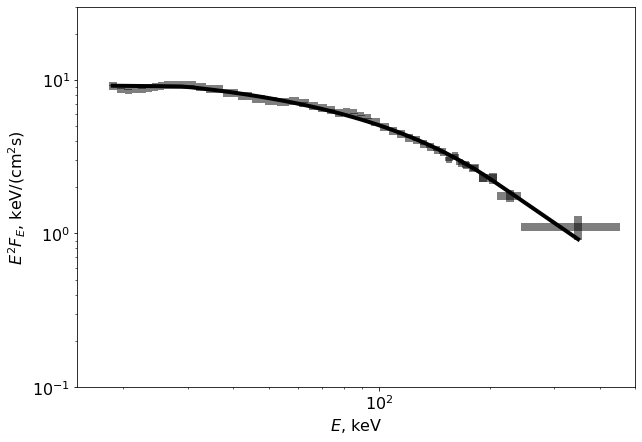

In [83]:
plt.figure(figsize=(10,7))

spectrum=np.genfromtxt(name+'_spectrum_osa10.txt',skip_header=3)
en=spectrum[:,0]
en_err=spectrum[:,1]
fl=spectrum[:,2]
fl_err=spectrum[:,3]
mo=spectrum[:,4]
plt.errorbar(en,fl,xerr=en_err,yerr=fl_err,linestyle='none',linewidth=8,color='black',alpha=0.5)
plt.plot(en,mo,color='black',linewidth=4)



plt.tick_params(axis='both', which='major', labelsize=16)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1.e-1,3.e1)
plt.xlim(15,500)
plt.xlabel('$E$, keV',fontsize=16)
plt.ylabel('$E^2F_E$, keV/(cm$^2$s)',fontsize=16)
plt.savefig(name+'_spectra.pdf',format='pdf',dpi=100)



In [110]:
lc_results=[]
for i in range(len(scw_lists_osa10)):
    print(i)
    data=disp.get_product(instrument='isgri',
                        product='isgri_lc',
                        scw_list=scw_lists_osa10[i],
                        E1_keV=E1_keV,
                        E2_keV=E2_keV,
                        query_type='Real',
                        osa_version='OSA10.2',
                        RA=ra,
                        DEC=dec,
                        product_type='Real',
                        time_bin=time_bin,
                        selected_catalog=api_cat)
    lc_results.append(data)

0
155500040010.001,155500050010.001,155500060010.001,155500070010.001,155500080010.001,155500090010.001,155500100010.001,155500110010.001,155500120010.001,155500140010.001,155500150010.001,155500160010.001,155500170010.001,155500180010.001,155500190010.001,155500200010.001,155500210010.001,155500220010.001,155500230010.001,155500240010.001,155500250010.001,155500260010.001,155500270010.001,155500280010.001,155500290010.001,155500300010.001,155500310010.001,155500320010.001,155500330010.001,155500340010.001,155500350010.001,155500360010.001,155500370010.001,155500380010.001,155500390010.001,155500400010.001,155500430010.001,155500440010.001,155500450010.001,155500460010.001,155500470010.001,155500480010.001,155500490010.001,155600040010.001,155600050010.001,155600060010.001,155600070010.001,155600080010.001,155600090010.001,155600100010.001
- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data
scw_list 155500040010.001,15550005001

In [111]:
t=[]
r=[]
err=[]
tot_counts=[]
backv=[]
backe=[]
i=0
for lc in lc_results:
    for ID,s in enumerate(lc._p_list):
        if s.meta_data['src_name']==source_name:
            i=i+1
            for tt in s.data_unit[1].data['TIME']:
                t.append(tt)
            for rr in s.data_unit[1].data['RATE']:
                r.append(rr)
            for ee in s.data_unit[1].data['ERROR']:
                err.append(ee)
            for tc in s.data_unit[1].data['TOT_COUNTS']:
                tot_counts.append(tc)
            for bv in s.data_unit[1].data['BACKV']:
                backv.append(bv)
            for be in s.data_unit[1].data['BACKE']:
                backe.append(be)
t=np.array(t)
r=np.array(r)
err=np.array(err)
tot_counts=np.array(tot_counts)
backv=np.array(backv)
backe=np.array(backe)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


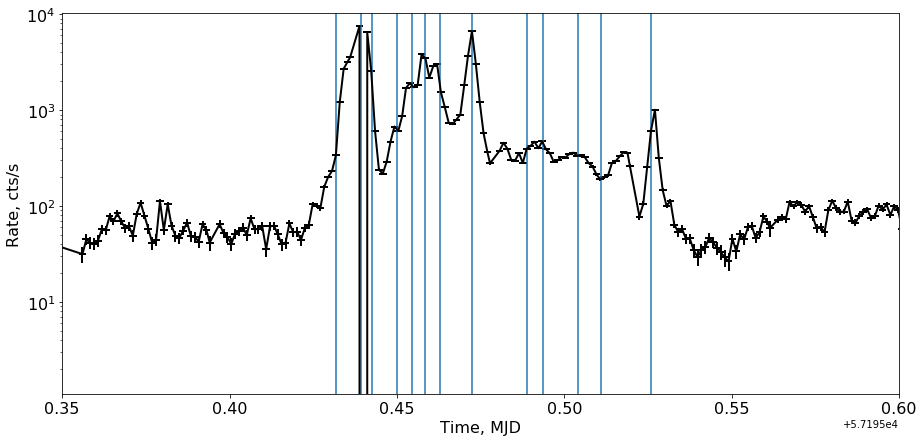

In [153]:
fig = plt.figure(figsize=(15,7))
t0=51544
tmin=t0+t[0]
tmax=t0+t[-1]
plt.errorbar(t+t0,r*exp((t+t0-52900)/40000.),yerr=err*exp((t+t0-52900)/40000.),xerr=100./86400.,linestyle='solid',color='black',alpha=1,linewidth=2)
rate=r*exp((t+t0-52900)/40000.)
plt.tick_params(axis='both', which='major', labelsize=16)
ymax=1.5*max(r+err)
#plt.xlim(57195.444,57195.604)
plt.xlim(57195.35,57195.6)

#plt.axvline(57195.441)
#plt.axvline(57195.457)
#plt.axvline(57195.527)

plt.axvline(57195.4725)

tt=[6.46,10.54,10.36,10.91,11.11,11.73,11.847,10.62,12.26,12.62]
ttt=[10.799,11,128,12.101]
for i in range(len(tt)):
    plt.axvline(57195.+tt[i]/24.)
for i in range(len(ttt)):
    plt.axvline(57195.+ttt[i]/24.)

plt.yscale('log')

plt.ylim(-0.1,ymax)
plt.xlabel('Time, MJD',fontsize=16)
plt.ylabel('Rate, cts/s',fontsize=16)
#plt.text(tmin,0.9*ymax, str(E1_keV)+'-'+str(E2_keV)+' keV',fontsize=16)
#plt.text(tmin,0.8*ymax, source_name,fontsize=16)
name=source_name.replace(" ", "")
plt.savefig(name+'_lc.pdf',format='pdf',dpi=100)



In [35]:

flare_count=0
tstart=[]
tstop=[]
thr=1000.
for i in range(1,len(t)-1):
    if(rate[i]>thr)and(rate[i-1]<thr):
        flare_count+=t
        tstart.append(t[i])
        print('start',t[i])
    if(rate[i]>thr)and(rate[i+1]<thr):
        tstop.append(t[i])
        print('stop',t[i])
print(len(tstart),len(tstop))




start 5649.93327760634
stop 5649.9355924182255
start 5649.99532611699
stop 5649.99933083926
start 5650.102439817036
stop 5650.1277220403645
start 5650.263185015505
stop 5650.26435607054
start 5650.266657257005
stop 5650.300250811045
start 5650.302565624475
stop 5650.302565624475
start 5650.307195260145
stop 5650.3106674846895
start 5650.312981752755
stop 5650.312981752755
start 5650.31645451807
stop 5650.32108415975
start 5650.32339897388
stop 5650.35566778616
start 5650.638894895885
stop 5650.6497912827945
start 5650.655578324429
stop 5650.66483758892
start 5650.731166263709
stop 5650.73811764233
start 5650.745052757965
stop 5650.745052757965
start 5650.9949789926195
stop 5651.000766034271
start 5651.00307322718
stop 5651.004242308494
start 5651.01465492786
stop 5651.04433084248
start 5651.046642928455
stop 5651.047811549535
start 5651.06758260401
stop 5651.075673439615
start 5651.077980088579
stop 5651.098821608025
start 5651.104882218795
stop 5651.104882218795
start 5651.17327313271

In [84]:
#if token!='':
scwlist_jemx1=queryxtime_jemx1()
scwlist_jemx2=queryxtime_jemx2()

m=len(scwlist_jemx1)
pointings_osa10_jemx1=[]
pointings_osa11_jemx1=[]
for i in range(m):
    if scwlist_jemx1[i][-2:]=='10':
        if(int(scwlist_jemx1[i][:4])<1626):
            pointings_osa10_jemx1.append(scwlist_jemx1[i]+'.001')
        else:
            pointings_osa11_jemx1.append(scwlist_jemx1[i]+'.001')
m_osa10_jemx1=len(pointings_osa10_jemx1)
m_osa11_jemx1=len(pointings_osa11_jemx1)
m=len(scwlist_jemx2)
pointings_osa10_jemx2=[]
pointings_osa11_jemx2=[]
for i in range(m):
    if scwlist_jemx2[i][-2:]=='10':
        if(int(scwlist_jemx2[i][:4])<1626):
            pointings_osa10_jemx2.append(scwlist_jemx2[i]+'.001')
        else:
            pointings_osa11_jemx2.append(scwlist_jemx2[i]+'.001')
m_osa10_jemx2=len(pointings_osa10_jemx2)
m_osa11_jemx2=len(pointings_osa11_jemx2)

print(pointings_osa10_jemx1)
print(pointings_osa11_jemx1)

https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem/api/v1.0/scwlist/cons/2015-06-20T15:49:59/2015-06-25T4:05:59?&ra=306.01591666667&dec=33.867194444444&radius=5.0&min_good_jemx1=1000
https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem/api/v1.0/scwlist/cons/2015-06-20T15:49:59/2015-06-25T4:05:59?&ra=306.01591666667&dec=33.867194444444&radius=5.0&min_good_jemx2=1000
['155500030010.001', '155500040010.001', '155500050010.001', '155500060010.001', '155500070010.001', '155500080010.001', '155500090010.001', '155500100010.001', '155500110010.001', '155500120010.001', '155500130010.001', '155500140010.001', '155500150010.001', '155500160010.001', '155500170010.001', '155500180010.001', '155500190010.001', '155500200010.001', '155500210010.001', '155500220010.001', '155500230010.001', '155500240010.001', '155500250010.001', '155500260010.001', '155500270010.001', '155500280010.001', '155500290010.001', '155500300010.001', '155500310010.001', '155500320010.001

In [85]:
scw_lists_osa10_jemx1=[]
scw_lists_osa11_jemx1=[]
count=0
scw_string=''
for i in range(m_osa10_jemx1):
    if count<50:
        scw_string=scw_string+str(pointings_osa10_jemx1[i])+','
        count+=1
    else:
        scw_lists_osa10_jemx1.append(scw_string[:-1])
        count=1
        scw_string=str(pointings_osa10_jemx1[i])+','
scw_lists_osa10_jemx1.append(scw_string[:-1])
print(len(scw_lists_osa10_jemx1))
count=0
scw_string=''
for i in range(m_osa11_jemx1):
    if count<50:
        scw_string=scw_string+str(pointings_osa11_jemx1[i])+','
        count+=1
    else:
        scw_lists_osa11_jemx1.append(scw_string[:-1])
        count=1
        scw_string=str(pointings_osa11_jemx1[i])+','
scw_lists_osa11_jemx1.append(scw_string[:-1])
print(len(scw_lists_osa11_jemx1))

scw_lists_osa10_jemx2=[]
scw_lists_osa11_jemx2=[]
count=0
scw_string=''
for i in range(m_osa10_jemx2):
    if count<50:
        scw_string=scw_string+str(pointings_osa10_jemx2[i])+','
        count+=1
    else:
        scw_lists_osa10_jemx2.append(scw_string[:-1])
        count=1
        scw_string=str(pointings_osa10_jemx2[i])+','
scw_lists_osa10_jemx2.append(scw_string[:-1])
print(len(scw_lists_osa10_jemx2))
count=0
scw_string=''
for i in range(m_osa11_jemx2):
    if count<50:
        scw_string=scw_string+str(pointings_osa11_jemx2[i])+','
        count+=1
    else:
        scw_lists_osa11_jemx2.append(scw_string[:-1])
        count=1
        scw_string=str(pointings_osa11_jemx2[i])+','
scw_lists_osa11_jemx2.append(scw_string[:-1])
print(len(scw_lists_osa11_jemx2))




2
1
2
1


In [86]:
data=disp.get_product(instrument='jemx',
                      jemx_num=1,
                      product='jemx_image',
                      scw_list=scw_lists_osa10_jemx1[0],
                      E1_keV=E1_keV_jemx,
                      E2_keV=E2_keV_jemx,
                      osa_version='OSA10.2',
                      RA=ra,
                      DEC=dec,
                      detection_threshold=5,
                      product_type='Real')

155500030010.001,155500040010.001,155500050010.001,155500060010.001,155500070010.001,155500080010.001,155500090010.001,155500100010.001,155500110010.001,155500120010.001,155500130010.001,155500140010.001,155500150010.001,155500160010.001,155500170010.001,155500180010.001,155500190010.001,155500200010.001,155500210010.001,155500220010.001,155500230010.001,155500240010.001,155500250010.001,155500260010.001,155500270010.001,155500280010.001,155500290010.001,155500300010.001,155500310010.001,155500320010.001,155500330010.001,155500340010.001,155500350010.001,155500360010.001,155500370010.001,155500380010.001,155500390010.001,155500400010.001,155500410010.001,155500420010.001,155500430010.001,155500440010.001,155500450010.001,155500460010.001,155500470010.001,155500480010.001,155500490010.001,155600030010.001,155600040010.001,155600050010.001
- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data
jemx_num 1
scw_list 155500030010.001,15

In [87]:
data.dispatcher_catalog_1.table

meta_ID,src_names,significance,ra,dec,FLAG,ERR_RAD
,,,deg,deg,,
int64,str12,float64,float64,float64,int64,float64
0,V404 Cyg,889.190673828125,306.01861572265625,33.863525390625,0,0.05000000074505806
1,Cyg X-1,265.0598449707031,299.59136962890625,35.203460693359375,0,0.05000000074505806
2,EXO 2030+375,19.25843048095703,308.0590515136719,37.6319465637207,0,0.05000000074505806
3,NEW SOURCE,15.70678997039795,303.08978271484375,33.409034729003906,0,0.05000000074505806


In [88]:
FLAG=0
torm=[]
for ID,n in enumerate(data.dispatcher_catalog_1.table['src_names']):
    print(n[0:3])
    if(n[0:3]=='NEW'):
        torm.append(ID)
    if(n==source_name):
        FLAG=1
print(torm)
data.dispatcher_catalog_1.table.remove_rows(torm)
nrows=len(data.dispatcher_catalog_1.table['src_names'])

V40
Cyg
EXO
NEW
[3]


In [89]:
data.dispatcher_catalog_1.table

meta_ID,src_names,significance,ra,dec,FLAG,ERR_RAD
,,,deg,deg,,
int64,str12,float64,float64,float64,int64,float64
0,V404 Cyg,889.190673828125,306.01861572265625,33.863525390625,0,0.05000000074505806
1,Cyg X-1,265.0598449707031,299.59136962890625,35.203460693359375,0,0.05000000074505806
2,EXO 2030+375,19.25843048095703,308.0590515136719,37.6319465637207,0,0.05000000074505806


In [90]:
api_cat_jemx=data.dispatcher_catalog_1.get_api_dictionary()

In [91]:
lc_results_jemx1=[]
for i in range(len(scw_lists_osa10_jemx1)):
    print(i)
    data=disp.get_product(instrument='jemx',
                        jemx_num=1,
                        product='jemx_lc',
                        scw_list=scw_lists_osa10_jemx1[i],
                        E1_keV=E1_keV_jemx,
                        E2_keV=E2_keV_jemx,
                        query_type='Real',
                        osa_version='OSA10.2',
                        RA=ra,
                        DEC=dec,
                        product_type='Real',
                        time_bin=time_bin,
                        selected_catalog=api_cat_jemx)
    lc_results_jemx1.append(data)

0
155500030010.001,155500040010.001,155500050010.001,155500060010.001,155500070010.001,155500080010.001,155500090010.001,155500100010.001,155500110010.001,155500120010.001,155500130010.001,155500140010.001,155500150010.001,155500160010.001,155500170010.001,155500180010.001,155500190010.001,155500200010.001,155500210010.001,155500220010.001,155500230010.001,155500240010.001,155500250010.001,155500260010.001,155500270010.001,155500280010.001,155500290010.001,155500300010.001,155500310010.001,155500320010.001,155500330010.001,155500340010.001,155500350010.001,155500360010.001,155500370010.001,155500380010.001,155500390010.001,155500400010.001,155500410010.001,155500420010.001,155500430010.001,155500440010.001,155500450010.001,155500460010.001,155500470010.001,155500480010.001,155500490010.001,155600030010.001,155600040010.001,155600050010.001
- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data
jemx_num 1
scw_list 155500030010.001,

In [40]:
t_jemx1=[]
r_jemx1=[]
err_jemx1=[]
backv_jemx1=[]
backe_jemx1=[]
i=0
for lc in lc_results_jemx1:
    for ID,s in enumerate(lc._p_list):
        if s.meta_data['src_name']==source_name:
            i=i+1
            for tt in s.data_unit[2].data['TIME']:
                t_jemx1.append(tt)
            for rr in s.data_unit[2].data['RATE']:
                r_jemx1.append(rr)
            for ee in s.data_unit[2].data['ERROR']:
                err_jemx1.append(ee)
            for bv in s.data_unit[2].data['BRATE']:
                backv_jemx1.append(bv)
            for be in s.data_unit[2].data['BERROR']:
                backe_jemx1.append(be)
t_jemx1=np.array(t_jemx1)
r_jemx1=np.array(r_jemx1)
err_jemx1=np.array(err_jemx1)
backv_jemx1=np.array(backv_jemx1)
backe_jemx1=np.array(backe_jemx1)

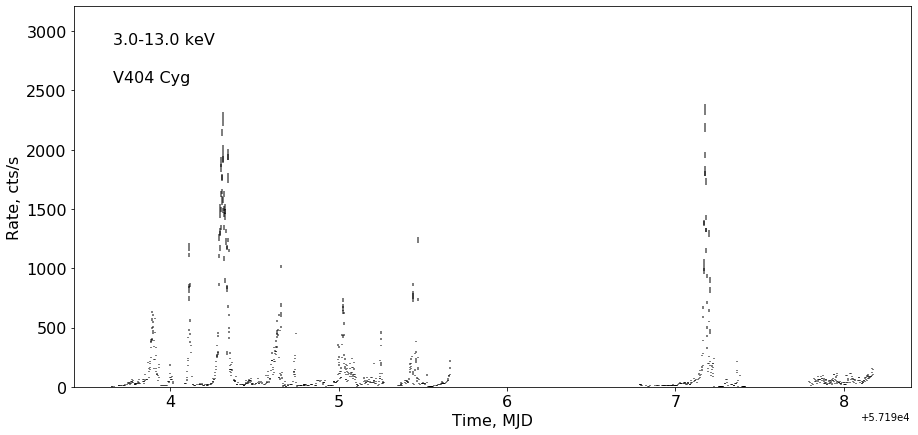

In [42]:
fig = plt.figure(figsize=(15,7))
t0=51544
tmin=t0+t[0]
tmax=t0+t[-1]
plt.errorbar(t_jemx1+t0,r_jemx1*exp((t_jemx1+t0-52900)/40000.),yerr=err_jemx1*exp((t_jemx1+t0-52900)/40000.),linestyle='none',color='black',alpha=0.5,linewidth=2)
rate=r_jemx1*exp((t_jemx1+t0-52900)/40000.)
plt.tick_params(axis='both', which='major', labelsize=16)
ymax=1.5*max(r_jemx1+err_jemx1)
plt.ylim(-0.1,ymax)
plt.xlabel('Time, MJD',fontsize=16)
plt.ylabel('Rate, cts/s',fontsize=16)
plt.text(tmin,0.9*ymax, str(E1_keV_jemx)+'-'+str(E2_keV_jemx)+' keV',fontsize=16)
plt.text(tmin,0.8*ymax, source_name,fontsize=16)

name=source_name.replace(" ", "")
plt.savefig(name+'_lc_jemx1.pdf',format='pdf',dpi=100)



(0, 2200)

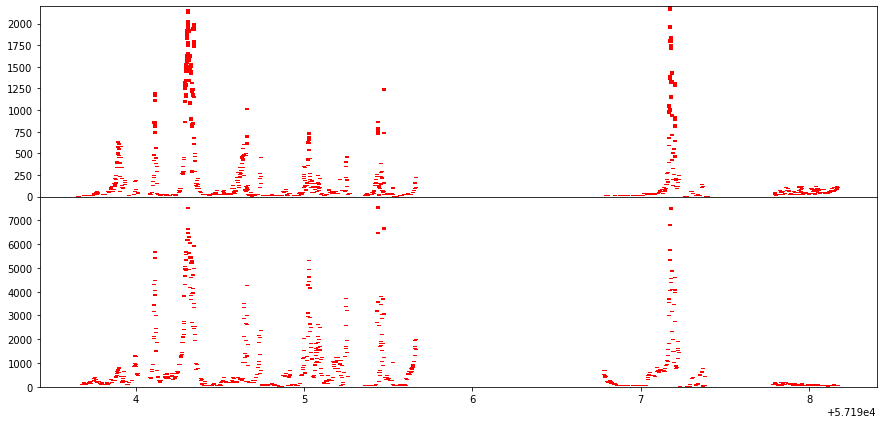

In [58]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0}, figsize=(15,7))
axs[0].errorbar(t_jemx1+t0,r_jemx1*exp((t_jemx1+t0-52900)/40000.),yerr=err_jemx1*exp((t_jemx1+t0-52900)/40000.),linestyle='none',color='red',alpha=1,linewidth=4)
axs[1].errorbar(t+t0,r*exp((t+t0-52900)/40000.),yerr=err*exp((t+t0-52900)/40000.),linestyle='none',color='red',alpha=1,linewidth=4)
#axs[0].plot(t_jemx1+t0,r_jemx1*exp((t_jemx1+t0-52900)/40000.),linestyle='solid',color='red',alpha=1,linewidth=1)
#axs[1].plot(t+t0,r*exp((t+t0-52900)/40000.),linestyle='solid',color='red',alpha=1,linewidth=1)

axs[1].set_ylim(0,7999)
axs[0].set_ylim(0,2200)



In [93]:
spectrum_results_jemx=[]
for i in range(len(scw_lists_osa10_jemx1)):
    print(i)
    data=disp.get_product(instrument='jemx',
                        jemx_num=1,
                        product='jemx_spectrum',
                        scw_list=scw_lists_osa10_jemx1[i],
                        query_type='Real',
                        osa_version='OSA10.2',
                        RA=ra,
                        DEC=dec,
                        product_type='Real',
                        selected_catalog=api_cat_jemx)
    spectrum_results_jemx.append(data)

0
155500030010.001,155500040010.001,155500050010.001,155500060010.001,155500070010.001,155500080010.001,155500090010.001,155500100010.001,155500110010.001,155500120010.001,155500130010.001,155500140010.001,155500150010.001,155500160010.001,155500170010.001,155500180010.001,155500190010.001,155500200010.001,155500210010.001,155500220010.001,155500230010.001,155500240010.001,155500250010.001,155500260010.001,155500270010.001,155500280010.001,155500290010.001,155500300010.001,155500310010.001,155500320010.001,155500330010.001,155500340010.001,155500350010.001,155500360010.001,155500370010.001,155500380010.001,155500390010.001,155500400010.001,155500410010.001,155500420010.001,155500430010.001,155500440010.001,155500450010.001,155500460010.001,155500470010.001,155500480010.001,155500490010.001,155600030010.001,155600040010.001,155600050010.001
- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data
jemx_num 1
scw_list 155500030010.001,

In [96]:
d=spectrum_results_jemx[0]
for ID,s in enumerate(d._p_list):
    print(s.meta_data)
    if (s.meta_data['src_name']==source_name):
        if(s.meta_data['product']=='jemx_spectrum'):
            ID_spec_jemx1=ID
        if(s.meta_data['product']=='jemx_arf'):
            ID_arf_jemx1=ID
        if(s.meta_data['product']=='jemx_rmf'):
            ID_rmf_jemx1=ID

print(ID_spec_jemx1, ID_arf_jemx1, ID_rmf_jemx1)



{'src_name': 'Cyg X-1', 'product': 'jemx_spectrum'}
{'src_name': 'Cyg X-1', 'product': 'jemx_arf'}
{'src_name': 'Cyg X-1', 'product': 'jemx_rmf'}
{'src_name': 'EXO 2030+375', 'product': 'jemx_spectrum'}
{'src_name': 'EXO 2030+375', 'product': 'jemx_arf'}
{'src_name': 'EXO 2030+375', 'product': 'jemx_rmf'}
{'src_name': 'NEW SOURCE', 'product': 'jemx_spectrum'}
{'src_name': 'NEW SOURCE', 'product': 'jemx_arf'}
{'src_name': 'NEW SOURCE', 'product': 'jemx_rmf'}
{'src_name': 'V404 Cyg', 'product': 'jemx_spectrum'}
{'src_name': 'V404 Cyg', 'product': 'jemx_arf'}
{'src_name': 'V404 Cyg', 'product': 'jemx_rmf'}
9 10 11


In [106]:
d=spectrum_results_jemx[0]
spec_jemx1=d._p_list[ID_spec_jemx1].data_unit[1].data
arf_jemx1=d._p_list[ID_arf_jemx1].data_unit[1].data
rmf_jemx1=d._p_list[ID_rmf_jemx1].data_unit[2].data
ch_jemx1=spec_jemx1['CHANNEL']
rate_jemx1=spec_jemx1['RATE']*0.
err_jemx1=spec_jemx1['STAT_ERR']*0.
syst_jemx1=spec_jemx1['SYS_ERR']*0.
rate_jemx1.fill(0)
err_jemx1.fill(0)
syst_jemx1.fill(0)
qual_jemx1=spec_jemx1['QUALITY']
matrix_jemx1=rmf_jemx1['MATRIX']*0.
specresp_jemx1=arf_jemx1['SPECRESP']*0.
tot_expos_jemx1=0.
corr_expos_jemx1=np.zeros(len(rate_jemx1))
print(len(rate_jemx1))
for k in range(len(scw_lists_osa10_jemx1)):
    d=spectrum_results_jemx[k]
    spec_jemx1=d._p_list[ID_spec_jemx1].data_unit[1].data
    arf_jemx1=d._p_list[ID_arf_jemx1].data_unit[1].data
    rmf_jemx1=d._p_list[ID_rmf_jemx1].data_unit[2].data
    expos_jemx1=d._p_list[0].data_unit[1].header['EXPOSURE']
    tot_expos_jemx1=tot_expos_jemx1+expos_jemx1
    print(k,expos_jemx1)
    for j in range(len(rate_jemx1)):
        if(spec_jemx1['QUALITY'][j]==0):          
            rate_jemx1[j]=rate_jemx1[j]+spec_jemx1['RATE'][j]/(spec_jemx1['STAT_ERR'][j])**2
            err_jemx1[j]=err_jemx1[j]+1./(spec_jemx1['STAT_ERR'][j])**2
            syst_jemx1[j]=syst_jemx1[j]+(spec_jemx1['SYS_ERR'][j])**2*expos_jemx1
            corr_expos_jemx1[j]=corr_expos_jemx1[j]+expos_jemx1
    matrix_jemx1=matrix_jemx1+rmf_jemx1['MATRIX']*expos_jemx1
    specresp_jemx1=specresp_jemx1+arf_jemx1['SPECRESP']*expos_jemx1

for i in range(len(rate_jemx1)):
    if err_jemx1[i]>0.:
        rate_jemx1[i]=rate_jemx1[i]/err_jemx1[i]
        err_jemx1[i]=1./sqrt(err_jemx1[i])
matrix_jemx1=matrix_jemx1/tot_expos_jemx1
specresp_jemx1=specresp_jemx1/tot_expos_jemx1
syst_jemx1=sqrt(syst_jemx1/(corr_expos_jemx1+1.))
print('Total exposure:',tot_expos_jemx1)

16
0 65573.1061967235
1 30132.7981028747
Total exposure: 95705.9042995982


In [107]:
d._p_list[ID_spec_jemx1].data_unit[1].data['RATE']=rate_jemx1
d._p_list[ID_spec_jemx1].data_unit[1].data['STAT_ERR']=err_jemx1
d._p_list[ID_rmf_jemx1].data_unit[2].data['MATRIX']=matrix_jemx1
d._p_list[ID_arf_jemx1].data_unit[1].data['SPECRESP']=specresp_jemx1

In [108]:
specname_jemx1=name+'_spectrum_osa10_jemx1.fits'
arfname_jemx1=name+'_arf_osa10_jemx1.fits.gz'
rmfname_jemx1=name+'_rmf_osa10_jemx1.fits.gz'
data._p_list[ID_spec_jemx1].write_fits_file(specname_jemx1)
data._p_list[ID_arf_jemx1].write_fits_file(arfname_jemx1)
data._p_list[ID_rmf_jemx1].write_fits_file(rmfname_jemx1)